In [1]:
from velotest.hypothesis_testing import run_hypothesis_test_on
from velotest.plotting import arrow_plot
import matplotlib.pyplot as plt
import scvelo

Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors


/Users/sebastian/tuebingen/openTSNE/venv/lib/python3.9/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/10 cores)


/Users/sebastian/tuebingen/openTSNE/venv/lib/python3.9/site-packages/scvelo/tools/optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:08) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
vkey='velocity', scale=10, self_transitions=True, use_negative_cosines=True
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


/Users/sebastian/tuebingen/openTSNE/venv/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/sebastian/tuebingen/openTSNE/venv/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/sebastian/tuebingen/openTSNE/venv/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/sebastian/tuebingen/openTSNE/venv/li

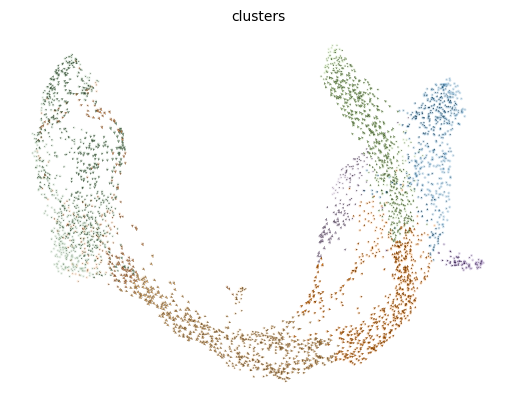

In [2]:
adata = scvelo.datasets.pancreas()
scvelo.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scvelo.pp.moments(adata, n_pcs=30, n_neighbors=30)

# Compute velocity
scvelo.tl.velocity(adata)

# Compute 2D embedding of velocity vectors
scvelo.tl.velocity_graph(adata)
scvelo.pl.velocity_embedding(adata)

In [3]:
# Run test
uncorrected_p_values, h0_rejected, _ = run_hypothesis_test_on(adata) 
# The most relevant parameters to consider are exclusion_degree=10 and number_neighbors_to_sample_from=300

Dropping all the genes which are not velocity genes. 1038 genes left.


100%|██████████| 3696/3696 [00:20<00:00, 179.09it/s]


<Axes: >

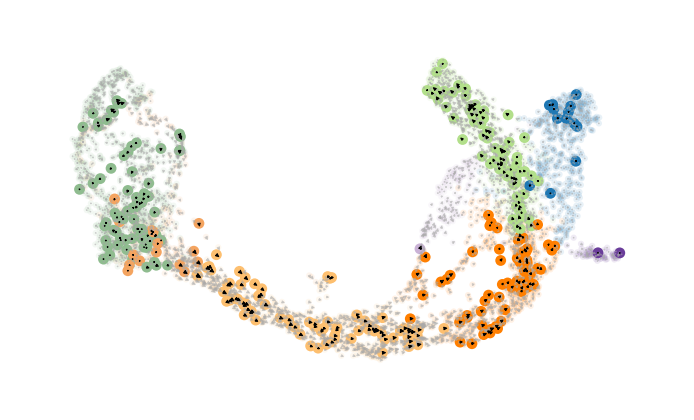

In [4]:
cm = 1 / 2.54  # centimeters in inches
fig, ax = plt.subplots(dpi=450, figsize=(4.4 * cm, 3.5 * cm))

arrow_plot(adata.obsm['X_umap'], adata.obsm['X_umap'] + adata.obsm['velocity_umap'], uncorrected_p_values,
           h0_rejected,
           labels=adata.obs['clusters'], label_colormap=dict(zip(adata.obs['clusters'].cat.categories, adata.uns['clusters_colors'])), multiplier=0.15,
           plot_legend=False,
           ax=ax)